# mtflib Demo: 3D Field Plotting Tools

This notebook demonstrates the usage of the new 3D field plotting tools in `demos.applications.em.plotting`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mtflib import *
from applications.em.current_ring import current_ring
from applications.em.plotting import (
    Coil, plot_field_on_line, plot_field_on_plane, plot_field_vectors_3d
)
from mtflib import MultivariateTaylorFunction

MultivariateTaylorFunction.initialize_mtf(max_order=6, max_dimension=4)
MultivariateTaylorFunction.set_etol(1e-12)

Initializing MTF globals with: _MAX_ORDER=6, _MAX_DIMENSION=4
Loading/Precomputing Taylor coefficients up to order 6
Global precomputed coefficients loading/generation complete.
Size of precomputed_coefficients dictionary in memory: 464 bytes, 0.45 KB, 0.00 MB
MTF globals initialized: _MAX_ORDER=6, _MAX_DIMENSION=4, _INITIALIZED=True
Max coefficient count (order=6, nvars=4): 210
Precomputed coefficients loaded and ready for use.


## 1. Define a Coil Configuration (Helmholtz Coil)

We will create a Helmholtz coil, which consists of two identical circular coils placed symmetrically along a common axis.

In [2]:
radius = 0.5
separation = 0.5
current = 1.0
num_segments = 20

# First coil
center1 = np.array([0, 0, -separation / 2])
segments1, lengths1, dirs1 = current_ring(
    radius, num_segments, center1, np.array([0, 0, 1])
)
coil1 = Coil(segments1, lengths1, dirs1, current=current, label='Coil 1', color='b')

# Second coil
center2 = np.array([0, 0, separation / 2])
segments2, lengths2, dirs2 = current_ring(
    radius, num_segments, center2, np.array([0, 0, 1])
)
coil2 = Coil(segments2, lengths2, dirs2, current=current, label='Coil 2', color='g')

helmholtz_coils = [coil1, coil2]

## 2. Demonstrate `plot_field_on_line`

c:\Users\manik\anaconda3\envs\mtf\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\manik\anaconda3\envs\mtf\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


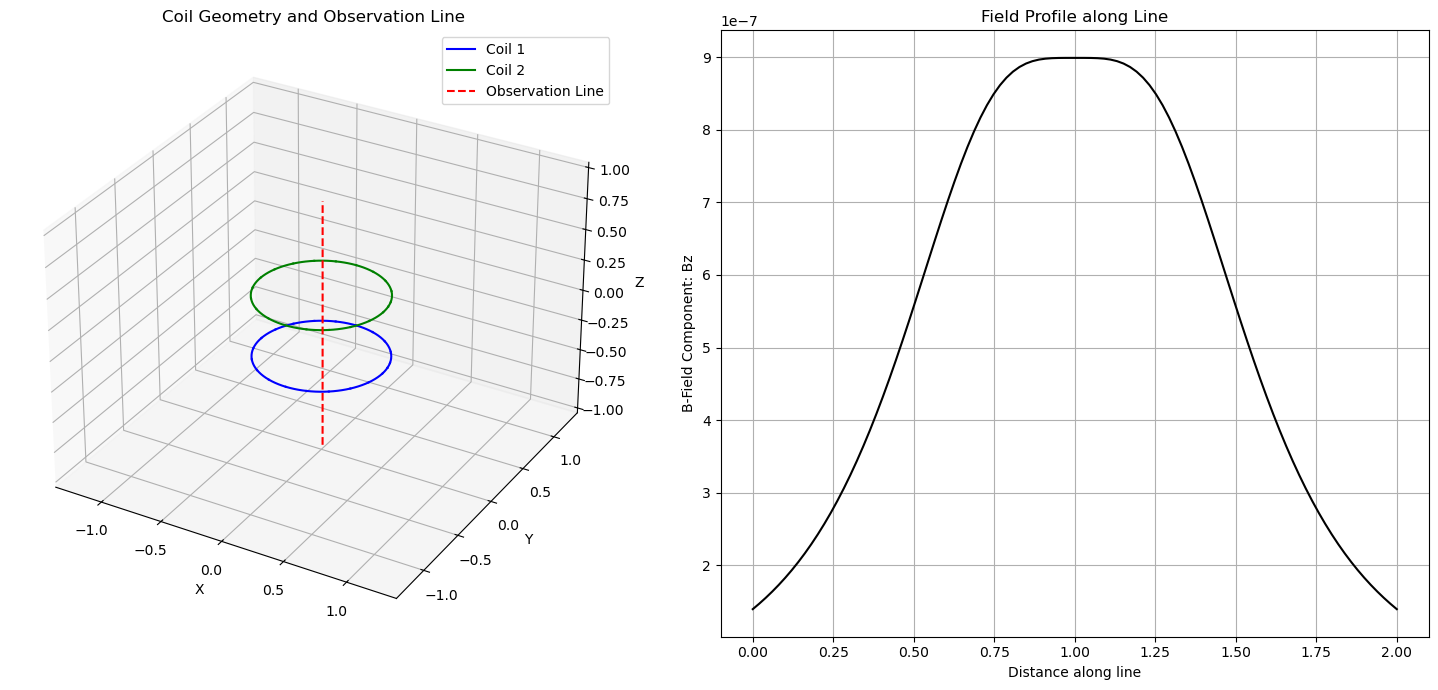

In [3]:
start = [0.01, 0, -1]
end = [0.01, 0, 1]
fig, (ax3d, ax2d) = plot_field_on_line(helmholtz_coils, start, end, component='Bz')
plt.show()

## 3. Demonstrate `plot_field_on_plane`

c:\Users\manik\anaconda3\envs\mtf\Lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:3305: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:]).astype(float)


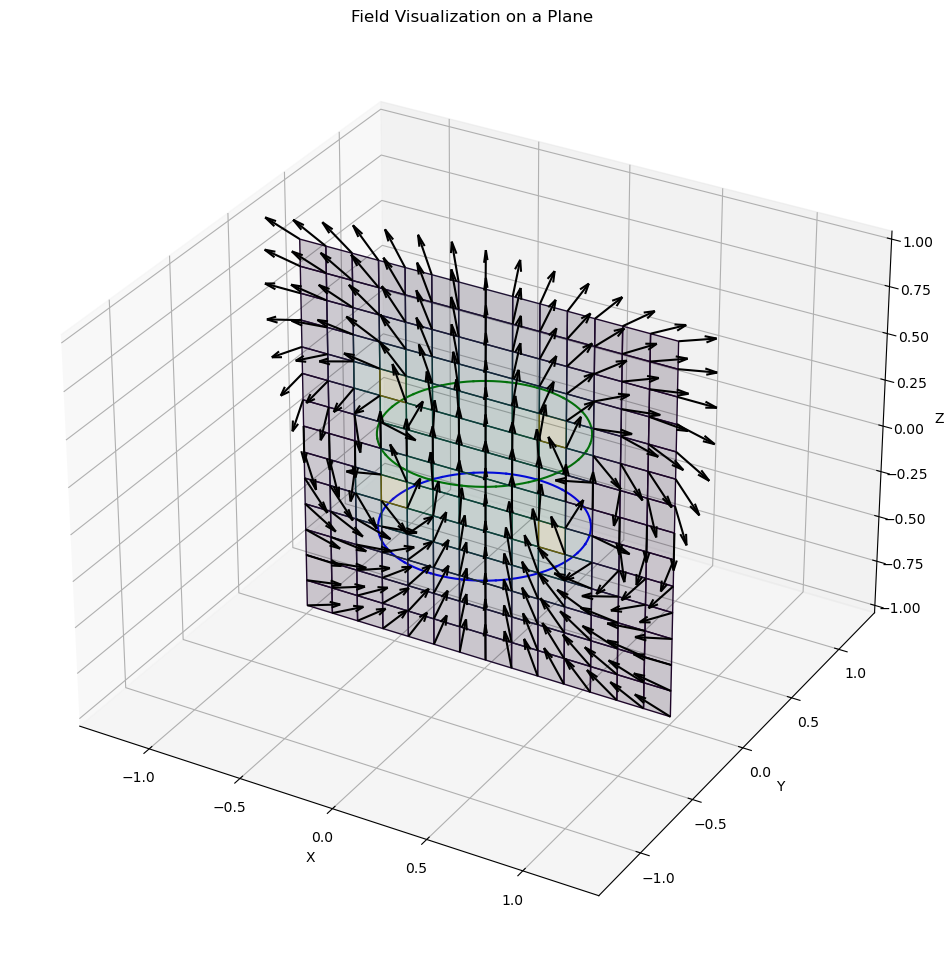

In [4]:
center = [0, 0.01, 0]
normal = [0, 1, 0]  # Plot on the x-z plane
fig, ax = plot_field_on_plane(
    helmholtz_coils, center, normal, 
    plot_type='quiver', size=(2, 2), resolution=(15, 15)
)
plt.show()

## 4. Demonstrate `plot_field_vectors_3d`

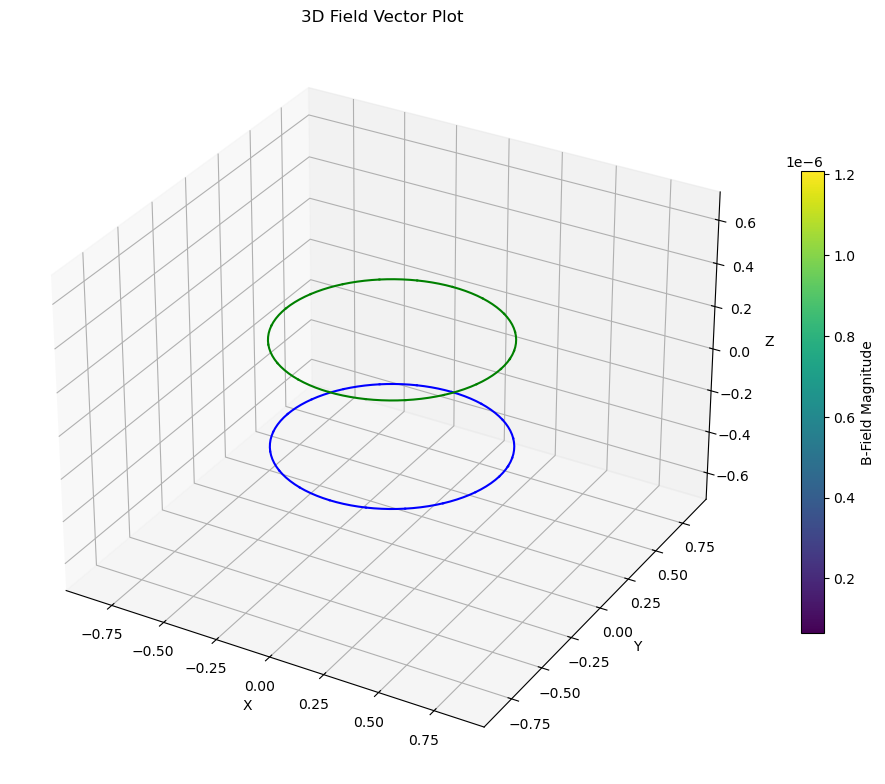

In [5]:
# Create a grid of points for the 3D vector plot
x_coords = np.linspace(-0.7, 0.7, 5)
y_coords = np.linspace(-0.7, 0.7, 5)
z_coords = np.linspace(-0.7, 0.7, 5)
points = np.array(np.meshgrid(x_coords, y_coords, z_coords)).T.reshape(-1, 3)

fig, ax = plot_field_vectors_3d(helmholtz_coils, points, scale=0.2)
plt.show()